## PROG8245 Assignment 2: (Total Marks 110)
## Start on 14th of October- Due on 1st of November

- TODO: write your name and ID below
- Name: Nikhil Shankar Chirakkal Sivasankaran
- ID: 9026254
- Kindly note that this assignment is to be solved by yourself, without the use of AI and chatbots.
- If chatbot usage is detected, the penalty that is discussed in Week 1 slides will apply.
- Each code block will have a Todo comment which explains the functionality, expected input, and expected output of the function.
- There are 10 marks in this assignment for commenting and code readability.


### Part 1: Visualizations (34)
**NOTE:** Each question for plot in the visualization section is expected to be represented in **one** graph, using the library of your choice:

#### **Question 1** 

Using the following dataset: https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv choose the most convenient graph to show the following:
(18 Marks)


**1. The relationship between the penguin's bill length and bill depth for each species.** (5 marks)

In [177]:
## TODO: Check your attributes, make a graph using Matplotlib or Seaborn to show the relationship needed
import pandas as pd
import sys
# We are using seaborn to plot scatter plots
import seaborn as sns
# To eliminate warnings from appearing in ipynb
import warnings
import matplotlib.pyplot as plt
from scipy.stats import zscore

warnings.filterwarnings('ignore')


penguins_df = pd.read_csv('../data/penguins.csv')
gasprice_df = pd.read_csv('../data/gas_prices.csv')
income_data_df = pd.read_csv('../data/income_data.csv')
museum_visitors_df = pd.read_csv('../data/museum_visitors.csv')
tb_raw_df = pd.read_csv('../data/tb-raw.csv')

print(penguins_df.head())
print(penguins_df.info())
print(penguins_df.describe())
print(len(penguins_df))

print(penguins_df['species'].unique())
#Adelie Chinstrao Gentoo



  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_

- We identify that there are 3 species. To analyse the relationship between billlength and bill depth we can use scatter plot and give unique colors to each species. This way we will be able to identify if there is any relation in the 2 features based on species.

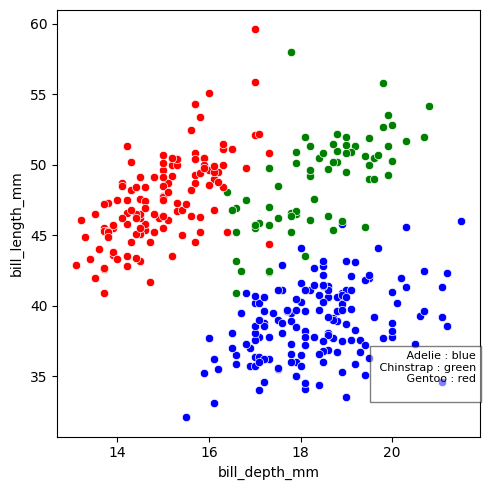

In [178]:
class DataSetInfo:
    def __init__(self, df, df_name, df_color):
        self.df = df
        self.df_name = df_name
        self.df_color = df_color
    
    def print(self):
        print(f'Dataset Name : {self.df_name} with {len(self.df)} entries and {len(self.df.columns)} columns')

    def title_for_plot(self):
        return f'{self.df_name} : {self.df_color}'

    def is_same_columns(self, datasetInfo):
        if list(self.df.columns) == list(datasetInfo.df.columns):
            return True
        else:
            return False

class ScatterPlotHelper:
    def plot_scatter_plot(self, target_column_name, datasetInfoList=[], feature_name_list=[], plots_in_a_row=4, figsize = (15,15), model_dict = {}):
        if len(datasetInfoList) == 0:
            raise Exception('Please pass atleast one dataframe')
        for i in range(1, len(datasetInfoList)):
            if datasetInfoList[0].is_same_columns(datasetInfoList[i]) == False:
                raise Exception('If you are passing multiple dataframes please make sure the column names and number are the same')
        feature_column_names = datasetInfoList[0].df.columns if len(feature_name_list) == 0 else feature_name_list 
        fig, axes = plt.subplots(int((len(feature_column_names)/plots_in_a_row)),plots_in_a_row, figsize=figsize)
        for i, col_name in enumerate(feature_column_names):
            minX = sys.maxsize-1
            maxX = -sys.maxsize-1
            for dataset in datasetInfoList:
                minX = min(dataset.df[col_name].min(), minX)
                maxX = max(dataset.df[col_name].max(), maxX)
                if col_name != target_column_name:
                    if col_name in dataset.df.columns and target_column_name in dataset.df.columns and not dataset.df.empty:
                        sns.scatterplot(data=dataset.df, x=col_name, y=target_column_name, ax=axes if len(feature_column_names) == 1 else axes[i%plots_in_a_row+1, i//plots_in_a_row], color=dataset.df_color)
                    else:
                        print('Some error')
            #Plotting the model prediction line
            feature_model = model_dict.get(col_name)
            if feature_model is not None:
                X_continuous = np.linspace(minX, maxX, 100)
                X_continuous = X_continuous.reshape(-1,1)
                predictions = feature_model.predict(X_continuous)
                pltAxes = axes if len(feature_column_names) == 1 else axes[i%plots_in_a_row+1, i//plots_in_a_row]
                print(f'{predictions.shape} {X_continuous.shape}')
                pltAxes.plot(X_continuous, predictions, linewidth=2, color='black')
        text = '' 
        for dataset in datasetInfoList:
            text = f'{text} {dataset.title_for_plot()}\n'
        plt.text(0.99, 0.2, text, fontsize=8, transform=plt.gca().transAxes,
                 bbox=dict(facecolor='white', alpha=0.5), 
                 ha='right', va='top')
        
        
        plt.tight_layout()
        plt.show()

penguins_df_adelie = penguins_df[penguins_df['species'] == 'Adelie']
penguins_df_chinstrap = penguins_df[penguins_df['species'] == 'Chinstrap']
penguins_df_gentoo = penguins_df[penguins_df['species'] == 'Gentoo']

penguins_df_adelie_info = DataSetInfo(penguins_df_adelie, 'Adelie', 'blue')
penguins_df_chinstrap_info = DataSetInfo(penguins_df_chinstrap, 'Chinstrap', 'green')
penguins_df_gentoo_info = DataSetInfo(penguins_df_gentoo, 'Gentoo', 'red')


scatter_plot_helper = ScatterPlotHelper()
               
scatter_plot_helper.plot_scatter_plot(target_column_name='bill_length_mm', 
                                      datasetInfoList=[penguins_df_adelie_info,
                                                       penguins_df_chinstrap_info,
                                                       penguins_df_gentoo_info], 
                                                       feature_name_list=['bill_depth_mm'], 
                                                       plots_in_a_row=1, figsize=(5,5))


 **What do you observe from the graph?** (2 marks)

Your answer here:

- Gentoo species have low bill depth while showing long bill length. 
- Gentoo species and Chinstrap show similar bill length while the separating feature between the two is the bill depth. Chinstrap species have deeper bill depth than Gentoo species.
- Chinstrap and Adelie both show deeper bill depth while the differentiating factor is the bill length . Chinstraps have longer bill length than Adelie species.
- A penguin with longer bill length and deeper bill depth is highly likely to be from Chinstrap species. 
- A penguin with long bill length and shallow bill depth is highly likely to be Gentoo
- Finally a penguin with short bill length and deep bill depth is highly likely to be an Adelie species.



**Why did you choose this type of graph?** (2 marks)

Your answer here:

- We had to identify the relation between bill length and bill depth. We had to do it for three different species. 
- Scatter plots help us identify the relationship between features easily. It can be linear, logarithmic, non linear and so many more. It is a great starting point to visualize if any relationship exists between features. 
- Scatter plots clubbed with colors to identify a third feature is what we used. The color represents the species. This way if there is any cluster or group characteristic for that particular species we will be able to identify it very easily.

**2. Suitable graph of the mean BMI (BMI not body_mass; BMI Equation is: weight_in_kg/height^2) of female and male penguins. (Assume the height is the flipper length)**  (5 marks)


  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex         bmi  
0       3750.0    MALE  114.465370  
1       3800.0  FEMALE  109.839288  
2       3250.0  FEMALE   85.470085  
3          NaN     NaN         NaN  
4       3450.0  FEMALE   92.619936  
      sex    species         bmi
0  FEMALE     Adelie   95.661018
1  FEMALE  Chinstrap   96.092106
2  FEMALE     Gentoo  103.425876
3    MALE     Adelie  109.366435
4    MALE  Chinstrap   98.465211
5    MALE     Gentoo  111.865057


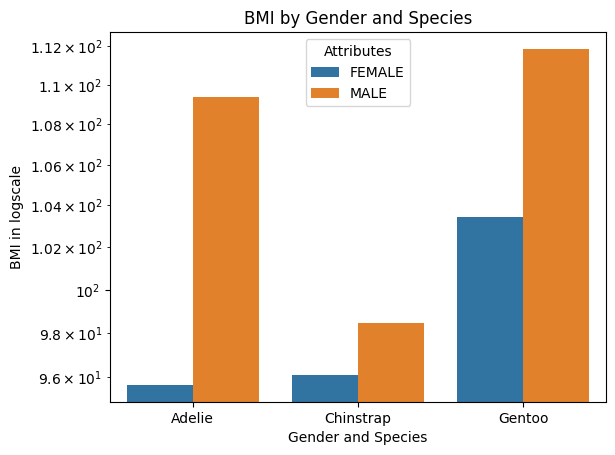

In [179]:
#Your answer here
penguins_df['bmi'] = (penguins_df['body_mass_g']/1000) / pow((penguins_df['flipper_length_mm']/1000),2)
print(penguins_df.head())

penguins_df = penguins_df.dropna()
penguins_df_mean = penguins_df.groupby(['sex','species'])['bmi'].mean().reset_index()
print(penguins_df_mean)
sns.barplot(x='species', y='bmi', hue='sex', data=penguins_df_mean)
plt.title("BMI by Gender and Species")
plt.yscale('log')
plt.ylabel("BMI in logscale")
plt.xlabel("Gender and Species")
plt.legend(title="Attributes")
plt.show()

 **What do you observe from the graph?** (2 marks)

Your answer here:

- Gentoo specieshave high BMI's when compared to the other two with one exception ie Adelie males have higher bmi's than Gentoo females.
- Both Gentoo females and males have higher bmi's than their counterpart in other species.
- Adelie species male and females show huge difference in their BMI's while Chinstrap and Gentoo not so much.
- While Adelie females show lower bmi than other two species, Adelie males have higher bmi than Chinstrap and the difference with Gentoo males is not that much significant.
- Gentoo females have higher bmi's than Chinstrap males also.
- Note that the y axis is represented in log scale and the range that we discuss is between 95 - 113 BMI.

**Why did you choose this type of graph?** (2 marks)

Your answer here:

- Bar graphs is easy to interpret and arrive at basic comparisons.
- It allows easy comparison between multiple species and gender at the same time using colors and height of the bar. 
- Had we chosen a stacked graph it wouldn't have been this easy to interpret since the height is stacked and we will miss the lesser signifacnt differences in height.
- Had we chosen pie chart then also we would have to have three pie graphs and it would be difficult to identify the lesser significnt differences.



#### **Question 2**

You can find the csv file that contains the museum visitors data here: ./CSVs/museum_visitors.csv
(8 marks)

Review the data by taking a look at a few of the rows.

In [180]:
# Your solution here
display(museum_visitors_df.head(25))
print(len(museum_visitors_df))

,Date,Avila Adobe,Firehouse Museum,Chinese American Museum,America Tropical Interpretive Center
0,2014-01-01,24778,4486,1581,6602
1,2014-02-01,18976,4172,1785,5029
2,2014-03-01,25231,7082,3229,8129
3,2014-04-01,26989,6756,2129,2824
4,2014-05-01,36883,10858,3676,10694
5,2014-06-01,29487,5751,2121,11036
6,2014-07-01,32378,5406,2239,13490
7,2014-08-01,37680,8619,1769,9139
8,2014-09-01,28473,61192,1073,5661
9,2014-10-01,27995,6488,1979,7356


59


- The date is given in the following format YYYY-MM-DD
- Visitors for every first day of the month for a period of 5 years is given for 4 different tourist attractions.

Convince the museum board 

The Firehouse Museum claims they ran an event in 2014 that brought an incredible number of visitors, and that they should get extra budget to run a similar event again.  The other museums think these types of events aren't that important, and budgets should be split purely based on recent visitors on an average day.  

To show the museum board how the event compared to regular traffic at each museum, create a suitable chart that shows how the number of visitors to each museum evolved over time.
(4 marks)

,Date,Place,value
0,2014-01-01,Avila Adobe,24778
1,2014-02-01,Avila Adobe,18976
2,2014-03-01,Avila Adobe,25231
3,2014-04-01,Avila Adobe,26989
4,2014-05-01,Avila Adobe,36883


708


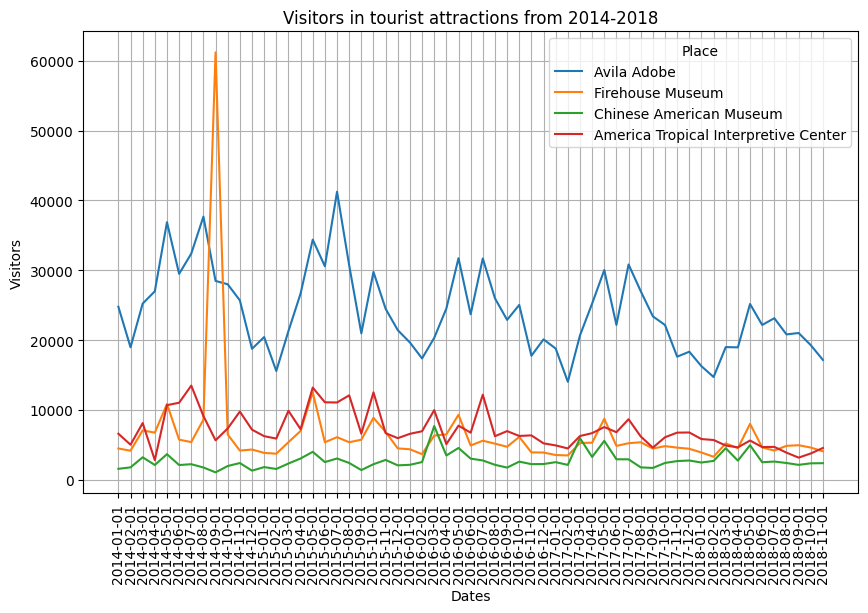

In [181]:
#Your solution here

#we are changing the structure of the dataframe in a way is suitable to create a line graph.
# As you can see it will create a new df with three columns, date, place and value. Value will 
# be filled with the corresponding value for that place against that date. So in total 
# we would have for each date and place 4 entries.
museum_visitors_df_melted = museum_visitors_df.melt(id_vars=['Date'], 
                                    var_name='Place', 
                                    value_vars=['Avila Adobe',
                                                'Firehouse Museum',
                                                'Chinese American Museum', 
                                                'America Tropical Interpretive Center'])
display(museum_visitors_df_melted.head())
print(museum_visitors_df_melted.size)
plt.figure(figsize=(10, 6))
sns.lineplot(data=museum_visitors_df_melted, x='Date', y='value', hue='Place')

# Adding labels and title
plt.title('Visitors in tourist attractions from 2014-2018')
plt.xticks(rotation=90)
plt.xlabel('Dates')
plt.ylabel('Visitors')
plt.grid()

What did you observe from the graph? (2 marks)

Your answer here

- The claim made by firehouse museum is true by analysing the graph. If we assume that the data that has been submitted is true then their claim is valid. 
- The usual vistors at firehouse museum has been consistently below 10000 before the event and after the event.
- The event which supposedly took place around 2014 August had an enormous impact in the number of visitors. In fact the impact was so huge that the visitors became 6X times of the usual number.
- The claim by other museum is a generic one and its understandable given the fact that Avila adobe would root for such a budget split since their average is higher compared to others. 
- The event doesn't have any long time impact though. Since we can see that the number of visitors since the event hasnt increased considerably on the contrary it has steadily declined not just for Firehouse Museum but for all the 4 places.
- A decision can be made for conducting an event based on the budget required for the event and the fact that it can spike the number of vistors by atleast 6X if conducted atleast in a similar fashion to what was done in 2014.
- Another interesting fact is that the spike of visitors in Firehouse museum during 2014 August disnt decrease the number of visitors in other places. The decrease that we see in other place is a seasonal one which can be noted in other years as well. So this also is a strong argument in favor of conducting events.

Why did you choose this type of graph? (2 marks)

You answer here

- We need to get an idea of the number of vistors across years for 4 different tourist atrractions and compare the. 
- This can be considered as a time series data and for visualizing it line graph is a perfect choice. 
- We can also identify some seasonality from the graph which I think is based on the time of year and number of visitors.

#### **Question 3**

Using the file in ./CSVs/gas_prices.csv <br>
Use a suitable plot/graph that will show the relationship between the average gas price for each country  over all years (vs others). (8 marks)

First, review the data by taking a look at a few of the rows.

In [182]:
# Your solution here
print(gasprice_df.head())
print(len(gasprice_df))
gasprice_df['Australia'].fillna(gasprice_df['Australia'].mean()).reset_index()



   Year  Australia  Canada  France  Germany  Italy  Japan  Mexico  \
0  1990        NaN    1.87    3.63     2.65   4.59   3.16    1.00   
1  1991       1.96    1.92    3.45     2.90   4.50   3.46    1.30   
2  1992       1.89    1.73    3.56     3.27   4.53   3.58    1.50   
3  1993       1.73    1.57    3.41     3.07   3.68   4.16    1.56   
4  1994       1.84    1.45    3.59     3.52   3.70   4.36    1.48   

   South Korea    UK   USA  
0         2.05  2.82  1.16  
1         2.49  3.01  1.14  
2         2.65  3.06  1.13  
3         2.88  2.84  1.11  
4         2.87  2.99  1.11  
19


,index,Australia
0,0,2.348889
1,1,1.960000
2,2,1.890000
3,3,1.730000
4,4,1.840000
5,5,1.950000
6,6,2.120000
7,7,2.050000
8,8,1.630000
9,9,1.720000


Then Plot using the most suitable plot on your opinion (5 marks)

([<matplotlib.axis.XTick at 0x1da9f4a6590>,
 [Text(1990, 0, '1990'),
  Text(1991, 0, '1991'),
  Text(1992, 0, '1992'),
  Text(1993, 0, '1993'),
  Text(1994, 0, '1994'),
  Text(1995, 0, '1995'),
  Text(1996, 0, '1996'),
  Text(1997, 0, '1997'),
  Text(1998, 0, '1998'),
  Text(1999, 0, '1999'),
  Text(2000, 0, '2000'),
  Text(2001, 0, '2001'),
  Text(2002, 0, '2002'),
  Text(2003, 0, '2003'),
  Text(2004, 0, '2004'),
  Text(2005, 0, '2005'),
  Text(2006, 0, '2006'),
  Text(2007, 0, '2007'),
  Text(2008, 0, '2008'),
  Text(1990, 0, '1990'),
  Text(1991, 0, '1991'),
  Text(1992, 0, '1992'),
  Text(1993, 0, '1993'),
  Text(1994, 0, '1994'),
  Text(1995, 0, '1995'),
  Text(1996, 0, '1996'),
  Text(1997, 0, '1997'),
  Text(1998, 0, '1998'),
  Text(1999, 0, '1999'),
  Text(2000, 0, '2000'),
  Text(2001, 0, '2001'),
  Text(2002, 0, '2002'),
  Text(2003, 0, '2003'),
  Text(2004, 0, '2004'),
  Text(2005, 0, '2005'),
  Text(2006, 0, '2006'),
  Text(2007, 0, '2007'),
  Text(2008, 0, '2008'),
  Text

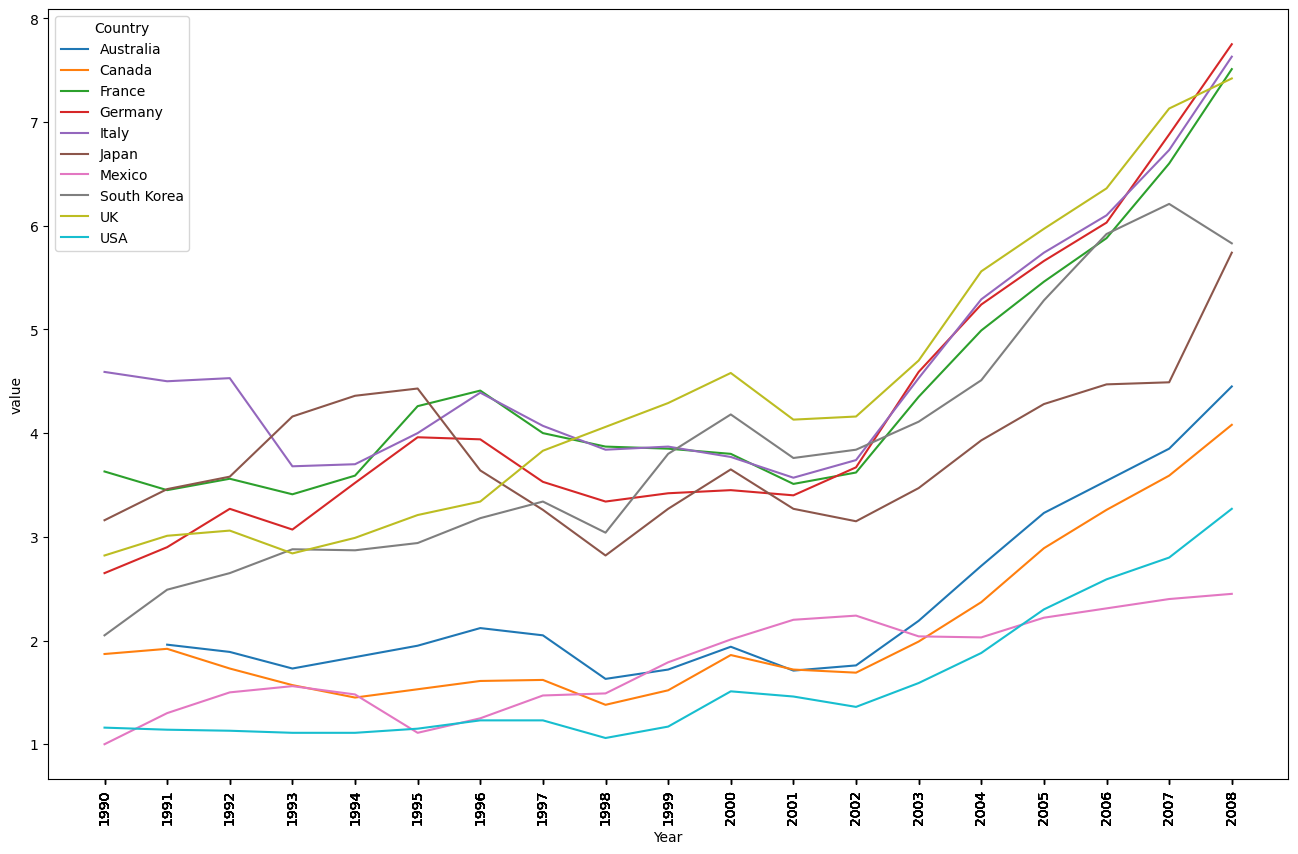

In [183]:
## Your solution here
plt.figure(figsize=(16, 10))
gasprice_df_melted = gasprice_df.melt(
    id_vars=['Year'], 
    value_vars=['Australia', 'Canada', 'France', 'Germany', 'Italy', 'Japan',
                'Mexico', 'South Korea', 'UK', 'USA'], var_name='Country')
sns.lineplot(x='Year', y='value', hue='Country', data=gasprice_df_melted)
plt.xticks(ticks=gasprice_df_melted['Year'],rotation=90)

Is there anything interesting observed from the plot/graph? (1 mark)

Your answer here
- From 2002 We can see a steep upward climb in gas prices across all countries.
- During 2007-08 this upward trend stayed the same for all countries except south korea.
- USA, Canada, Australia and Mexico have consistently shown lower prices in gas when compared to other coutries.
-Mexico has succeeded in controlling the upward trend in gas prices most efffectively over the years.


Why did you choose this type of graph? (2 marks)

You answer here
- Initially I tried plotting a bar chart. A bar chart for each year was difficult to interpret especially since there were multiple entries for each year based on the country and it was difficult to see signifacnt difference or trends.
- Since we have a time series kind of data a line graph is optimal in showing trends. 
- It reduces clutter that happens when we use a bar graph.
- Its easy to identify trends for each country separately.

### Part 2: Data Tidying and Preprocessing (24)

#### **Question 4:** (12)
**Tuberculosis Dataset** 
This dataset outlines the number of tuberculosis patients in different countries in the year 2000.<br>
Dataset name: tb-raw.csv <br>
A few notes on the raw data set:<br>

- The columns starting with "m" or "f" contain multiple variables:  
    - Sex ("m" or "f")
    - Age Group ("0-14","15-24", "25-34", "45-54", "55-64", "65", "unknown")
- Mixture of 0s and missing values("NaN"). This is due to the data collection process and the **distinction** is important for this dataset.


- Task: Apply Data Tidying techniques to get a tidier dataset with more representive columns, please do it step-by-step and explain each step you are doing.
(12 Marks)

In [184]:
## TODO: Apply your Data Tidying Technique here
display(tb_raw_df.head())
print(tb_raw_df.describe())

,country,year,m014,m1524,m2534,m3544,m4554,m5564,m65,mu,f014
0,AD,2000,0.0,0.0,1.0,0.0,0,0,0.0,NaN,NaN
1,AE,2000,2.0,4.0,4.0,6.0,5,12,10.0,NaN,3.0
2,AF,2000,52.0,228.0,183.0,149.0,129,94,80.0,NaN,93.0
3,AG,2000,0.0,0.0,0.0,0.0,0,0,1.0,NaN,1.0
4,AL,2000,2.0,19.0,21.0,14.0,24,19,16.0,NaN,3.0


         year        m014       m1524        m2534       m3544       m4554  \
count    10.0    9.000000    9.000000     9.000000    9.000000   10.000000   
mean   2000.0   37.888889  186.666667   215.222222  179.555556  112.300000   
std       0.0   65.000855  323.486862   352.279640  304.709743  183.479972   
min    2000.0    0.000000    0.000000     0.000000    0.000000    0.000000   
25%    2000.0    0.000000    0.000000     1.000000    2.000000    0.250000   
50%    2000.0    2.000000   19.000000    21.000000   14.000000   14.500000   
75%    2000.0   52.000000  228.000000   183.000000  149.000000  112.500000   
max    2000.0  186.000000  999.000000  1003.000000  912.000000  482.000000   

            m5564         m65   mu       f014  
count   10.000000    9.000000  0.0    8.00000  
mean    83.200000   72.444444  NaN   58.62500  
std    138.869883  115.379928  NaN   90.09826  
min      0.000000    0.000000  NaN    0.00000  
25%      0.250000    1.000000  NaN    1.00000  
50%     1

1. We can see that for males we have data from 0-65 and unknown whereas female data is available only from 0-14.
2. We can check the count of NaN in all columns.

In [185]:
print(len(tb_raw_df))
print(tb_raw_df.isna().sum())

10
country     0
year        0
m014        1
m1524       1
m2534       1
m3544       1
m4554       0
m5564       0
m65         1
mu         10
f014        2
dtype: int64


3. We can remove mu column completely since all the rows are filled with NaN.

In [186]:
tb_raw_df = tb_raw_df.drop(columns=['mu'])
print(tb_raw_df)

  country  year   m014  m1524   m2534  m3544  m4554  m5564    m65   f014
0      AD  2000    0.0    0.0     1.0    0.0      0      0    0.0    NaN
1      AE  2000    2.0    4.0     4.0    6.0      5     12   10.0    3.0
2      AF  2000   52.0  228.0   183.0  149.0    129     94   80.0   93.0
3      AG  2000    0.0    0.0     0.0    0.0      0      0    1.0    1.0
4      AL  2000    2.0   19.0    21.0   14.0     24     19   16.0    3.0
5      AM  2000    2.0  152.0   130.0  131.0     63     26   21.0    1.0
6      AN  2000    0.0    0.0     1.0    2.0      0      0    0.0    0.0
7      AO  2000  186.0  999.0  1003.0  912.0    482    312  194.0  247.0
8      AR  2000   97.0  278.0   594.0  402.0    419    368  330.0  121.0
9      AS  2000    NaN    NaN     NaN    NaN      1      1    NaN    NaN


Now we can split multi valued columns into two different columns 'Gender' and 'Age Group' 

In [187]:
tb_raw_melted = tb_raw_df.melt(id_vars=['country', 'year'], 
                                                value_vars=['m014', 'm1524', 'm2534', 'm3544', 'm4554', 'm5564', 'm65', 'f014'],
                                                var_name='Gender-Age')


In [188]:
display(tb_raw_melted.head())
display(len(tb_raw_melted))

,country,year,Gender-Age,value
0,AD,2000,m014,0.0
1,AE,2000,m014,2.0
2,AF,2000,m014,52.0
3,AG,2000,m014,0.0
4,AL,2000,m014,2.0


80

Now we can create two columns one for gender and one for age range

In [189]:
result = tb_raw_melted['Gender-Age'].str.extract(r'([mf])(\d+)')
print(result)
tb_raw_melted_2 = tb_raw_melted.copy()
tb_raw_melted_2[['Gender', 'Age-Group']] = result
display(tb_raw_melted_2) 



    0    1
0   m  014
1   m  014
2   m  014
3   m  014
4   m  014
.. ..  ...
75  f  014
76  f  014
77  f  014
78  f  014
79  f  014

[80 rows x 2 columns]


,country,year,Gender-Age,value,Gender,Age-Group
0,AD,2000,m014,0.0,m,014
1,AE,2000,m014,2.0,m,014
2,AF,2000,m014,52.0,m,014
3,AG,2000,m014,0.0,m,014
4,AL,2000,m014,2.0,m,014
...,...,...,...,...,...,...
75,AM,2000,f014,1.0,f,014
76,AN,2000,f014,0.0,f,014
77,AO,2000,f014,247.0,f,014
78,AR,2000,f014,121.0,f,014


Now we can categorize the age group to categorical values. eg If we define 0-14 as Children then we lose the definition of children by doing so. Keeping it this way the column name speaks for itself. So cleaning the column value is something we can do. So we still choose to change it into categorical column but without losing the data that is embedded.

In [190]:
mapper = {
    '014': '0-14',
    '1524': '15-24',
    '2534': '25-34',
    '3544': '35-44',
    '4554': '45-54',
    '5564': '55-64',
    '65': 'Above 65'
}
tb_raw_melted_3 = tb_raw_melted_2.copy()
tb_raw_melted_3['Age-Group'] = tb_raw_melted_3['Age-Group'].replace(mapper)
display(tb_raw_melted_3)

,country,year,Gender-Age,value,Gender,Age-Group
0,AD,2000,m014,0.0,m,0-14
1,AE,2000,m014,2.0,m,0-14
2,AF,2000,m014,52.0,m,0-14
3,AG,2000,m014,0.0,m,0-14
4,AL,2000,m014,2.0,m,0-14
...,...,...,...,...,...,...
75,AM,2000,f014,1.0,f,0-14
76,AN,2000,f014,0.0,f,0-14
77,AO,2000,f014,247.0,f,0-14
78,AR,2000,f014,121.0,f,0-14


Now we can remove the Gender-Age column.
We can rename the columns as well.

In [191]:
tb_raw_melted_4 = tb_raw_melted_3.copy()
#removing redundant column which we have already splitted.
tb_raw_melted_4 = tb_raw_melted_4.drop(columns=['Gender-Age'])
#uniforming naming in column name
tb_raw_melted_4 = tb_raw_melted_4.rename(columns={'country': 'Country', 'year': 'Year', 'value':'Patient Count'})
#moving patient count column to the rightmost end
tb_raw_melted_4 = tb_raw_melted_4.reindex(columns=[col for col in tb_raw_melted_4.columns if col != 'Patient Count'] + ['Patient Count'])
display(tb_raw_melted_4)

,Country,Year,Gender,Age-Group,Patient Count
0,AD,2000,m,0-14,0.0
1,AE,2000,m,0-14,2.0
2,AF,2000,m,0-14,52.0
3,AG,2000,m,0-14,0.0
4,AL,2000,m,0-14,2.0
...,...,...,...,...,...
75,AM,2000,f,0-14,1.0
76,AN,2000,f,0-14,0.0
77,AO,2000,f,0-14,247.0
78,AR,2000,f,0-14,121.0


4. We have NaN values in m014, m1524, m2534, m3544, m65 and f014 also have some NaN values. Lets see the data once more.

In [192]:
print(tb_raw_melted_4.isna().sum())

Country          0
Year             0
Gender           0
Age-Group        0
Patient Count    7
dtype: int64


There are two ways to resolve the NaN values. One is imputation and the other is removal. Removal is not the ideal cjoice here since in that case country 'AS' will get removed along with country AD. 
- Also we cant impute the value with 0 since zero and unknown data are two values which have very significant semantic meaning. 
- Imputing with mean median etc is not ideal since that would not represent the data accurately and chances of skew is there. 
- So another way to handle this will be to introduce a new column for each group which denotes the type of value. ie either zero, an actual value or unknown. And then we can fill the NaN values with 0. This way we will be able to keep the NaN rows and still if needed we can remove them from analysis using the new column we created.
- The disadvantage of this approach is that for eacch existing column we will have to create another column which is expensive for huge datasets.
- But since the ask only mentions about maintaining the distinction as the important concern and sicne we have a relatively small dataset with 80 rows adding an additional column should not be an issue, in fact that would be preferrable.

In [193]:
tb_raw_corrected = tb_raw_melted_4.copy()
tb_raw_corrected['Is Unknown'] = tb_raw_corrected['Patient Count'].isna()
# Fill NaN values with 0
tb_raw_corrected = tb_raw_corrected.fillna(0)
display(tb_raw_corrected.head(10))

,Country,Year,Gender,Age-Group,Patient Count,Is Unknown
0,AD,2000,m,0-14,0.0,False
1,AE,2000,m,0-14,2.0,False
2,AF,2000,m,0-14,52.0,False
3,AG,2000,m,0-14,0.0,False
4,AL,2000,m,0-14,2.0,False
5,AM,2000,m,0-14,2.0,False
6,AN,2000,m,0-14,0.0,False
7,AO,2000,m,0-14,186.0,False
8,AR,2000,m,0-14,97.0,False
9,AS,2000,m,0-14,0.0,True


#### Question 5: (12) <br>
Using Boston House pricing dataset, apply outlier detection techniques discussed in class to detect outliers. Use different techniques and comment your code. <br>
You need to check how to load the dataset correctly! <br>
1. You should include some Visualization techniques
2. You should include some statistical approaches
3. You should analyze your attributes using **Univariant and multivariant** outlier detection techniques.
4. Choose one or more of your outlier detection techniques and remove outliers

In [194]:
# Importing
import requests

data_url = "http://lib.stat.cmu.edu/datasets/boston"

def download_url(url):
    file_path = "boston"
    # Downloading the file
    response = requests.get(url)
    text = response.text
    # Save the content to a file
    data_lines = text.splitlines()[22:]
    # Parse the data into rows of 14 columns each
    data = []
    for i in range(0, len(data_lines), 2):
        line1 = data_lines[i].split()
        line2 = data_lines[i+1].split()
        row = line1 + line2
        data.append(row)
    columnNames = [
        "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", 
        "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"
    ]
    df = pd.DataFrame(data, columns=columnNames).astype(float)

    # Display the DataFrame
    print(df.head())
    return df

boston_df = download_url(data_url)


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


##### **Outlier Detection**

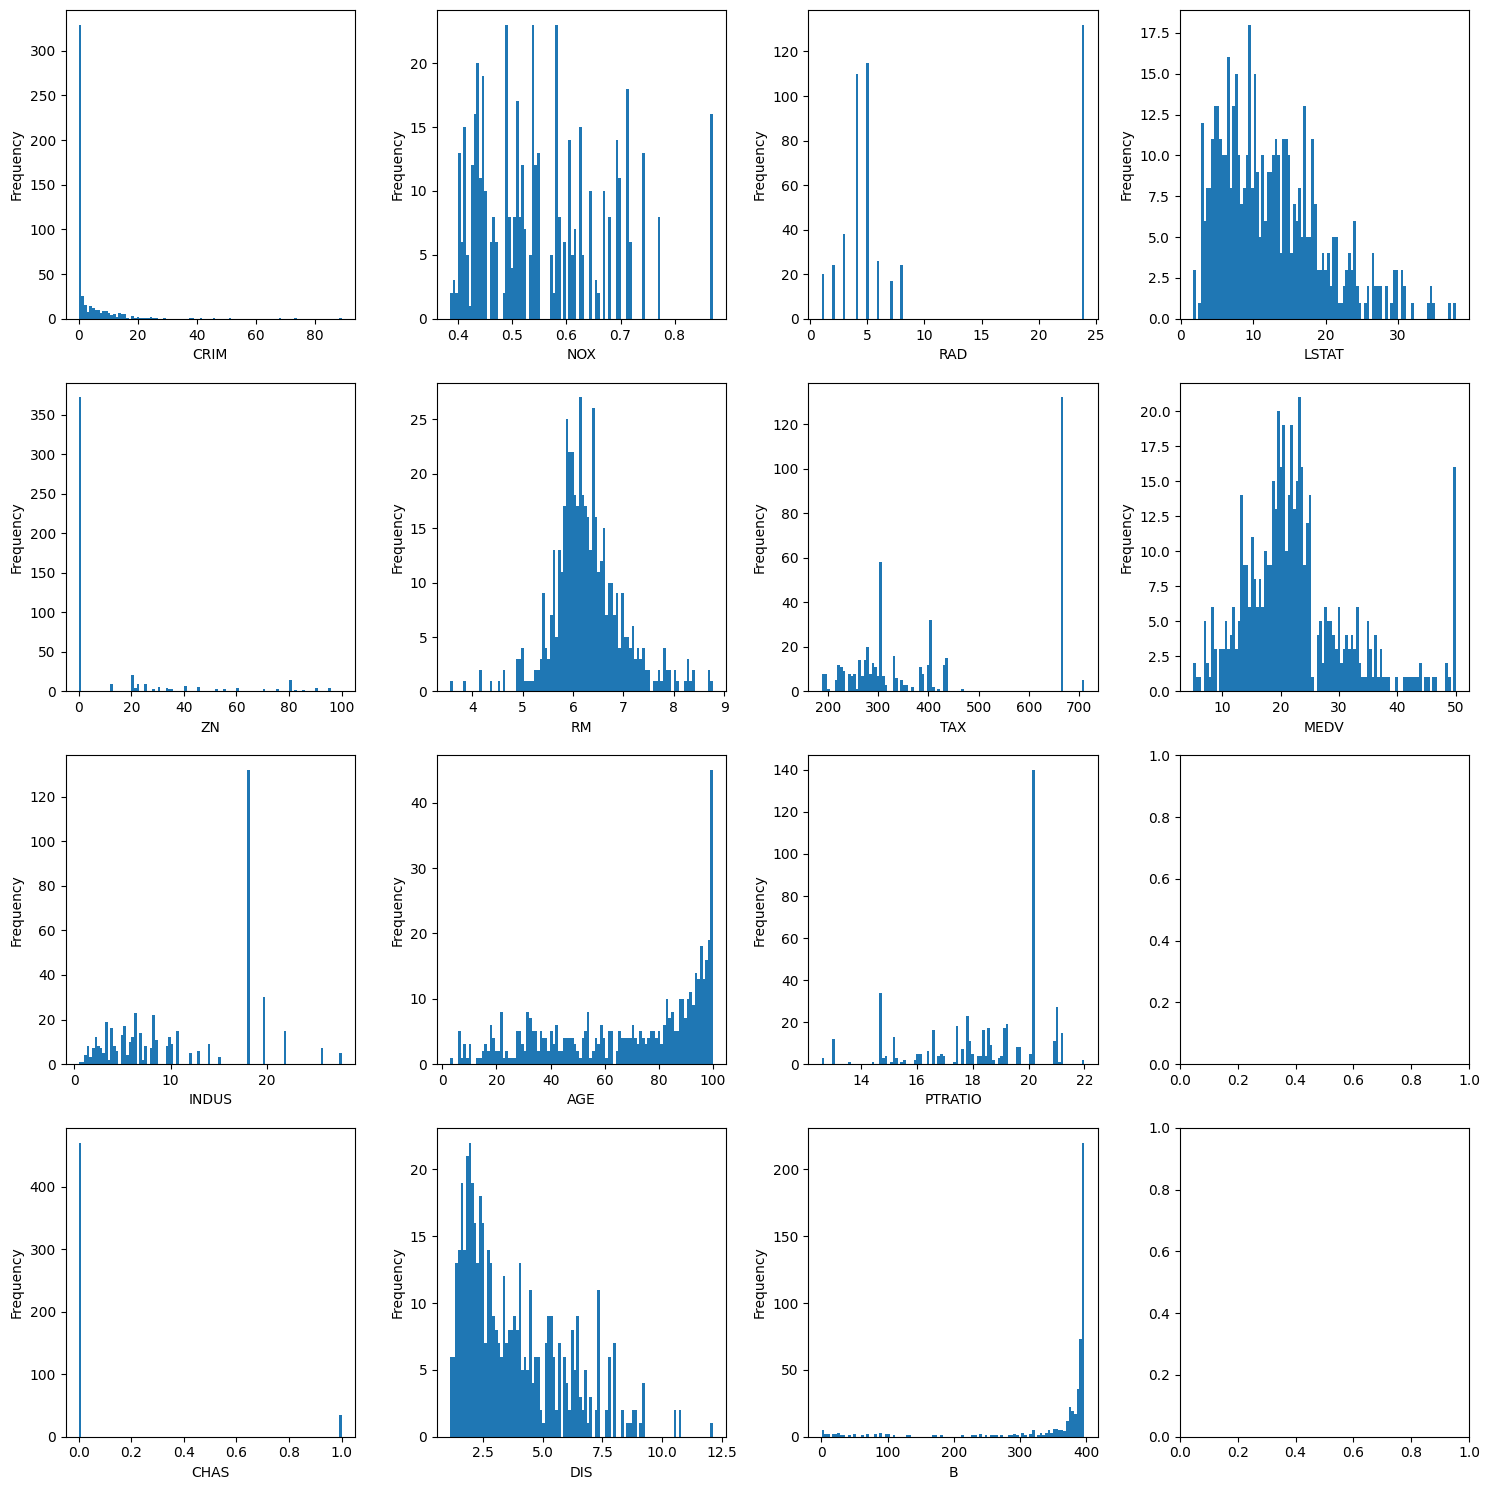

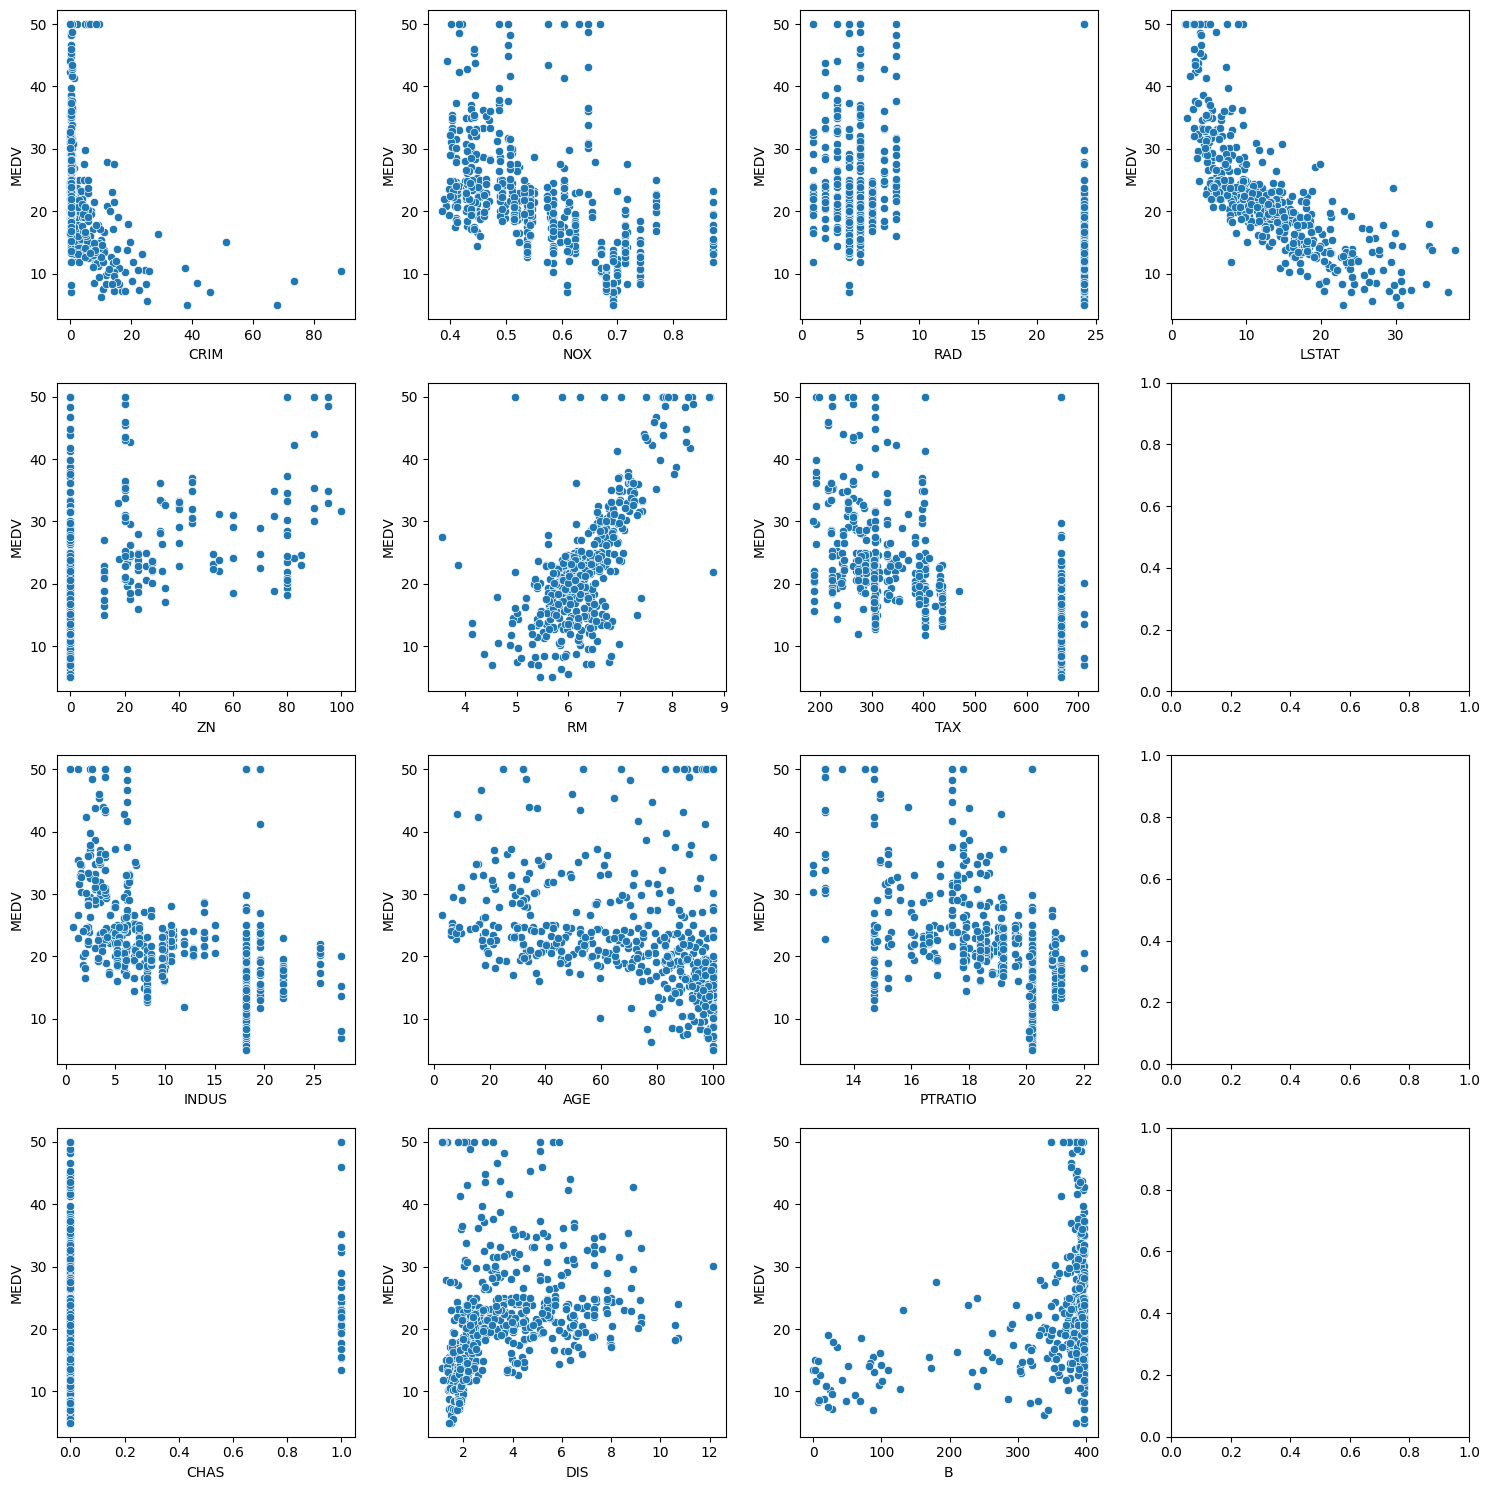

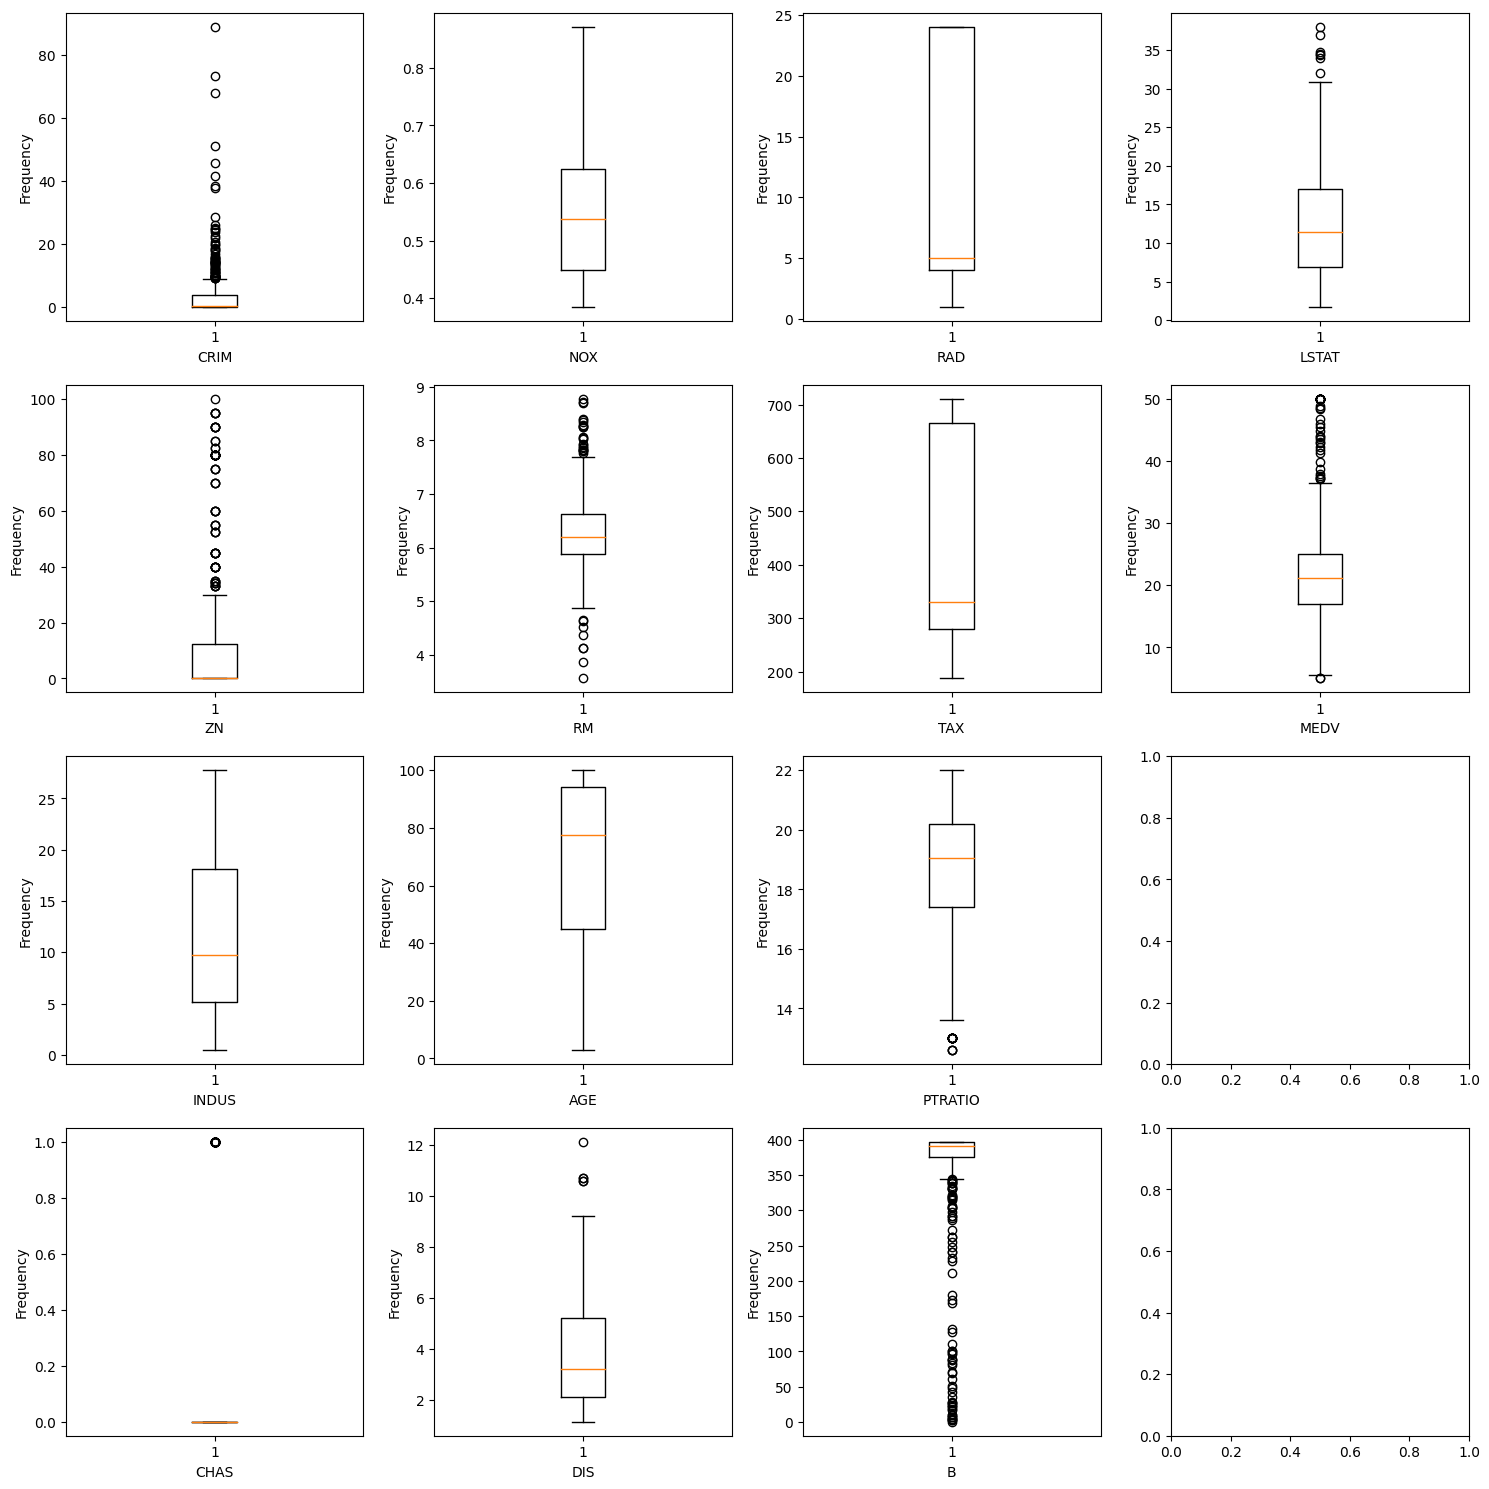

In [195]:
#Histogram creation for all features
def plot_histogram(df):
    fig,axes = plt.subplots(4, int(len(df.columns)//4)+1, figsize=(15,15))
    for i, col_name in enumerate(df.columns):
        axes[i%4, i//4].hist(df[col_name], bins=100)
        axes[i%4, i//4].set_xlabel(col_name)
        axes[i%4, i//4].set_ylabel('Frequency')
    plt.tight_layout()
    plt.show()

#Scatter Plots
# created a function for plotting scatter diagram which uses seaborn.
def plot_scatter_diagram(df, dependent_column_name):
    fig, axes = plt.subplots(4, int((len(df.columns)/4) + 1),figsize=(15,15))
    for i, col_name in enumerate(df.columns):
        if col_name != dependent_column_name:
            sns.scatterplot(x=col_name, y=dependent_column_name, data=df, ax=axes[i%4, i//4])
    plt.tight_layout()
    plt.show()

#Whisker Plots
def plot_whisker(df):
    fig,axes = plt.subplots(4, int(len(df.columns)//4)+1, figsize=(15,15))
    for i, col_name in enumerate(df.columns):
        axes[i%4, i//4].boxplot(df[col_name])
        axes[i%4, i//4].set_xlabel(col_name)
        axes[i%4, i//4].set_ylabel('Frequency')
    plt.tight_layout()
    plt.show()

plot_histogram(boston_df)
plot_scatter_diagram(boston_df, 'MEDV')
plot_whisker(boston_df)

- CRIM, ZN, B, RM, MEDV, LSTAT and PTRATIO have outliers detected based on whisker approach.
- CHAS has outliers but its a binary feature and hence it cant be considered as outliers otherwise it loses its meaning.
- We can try z-score approach also

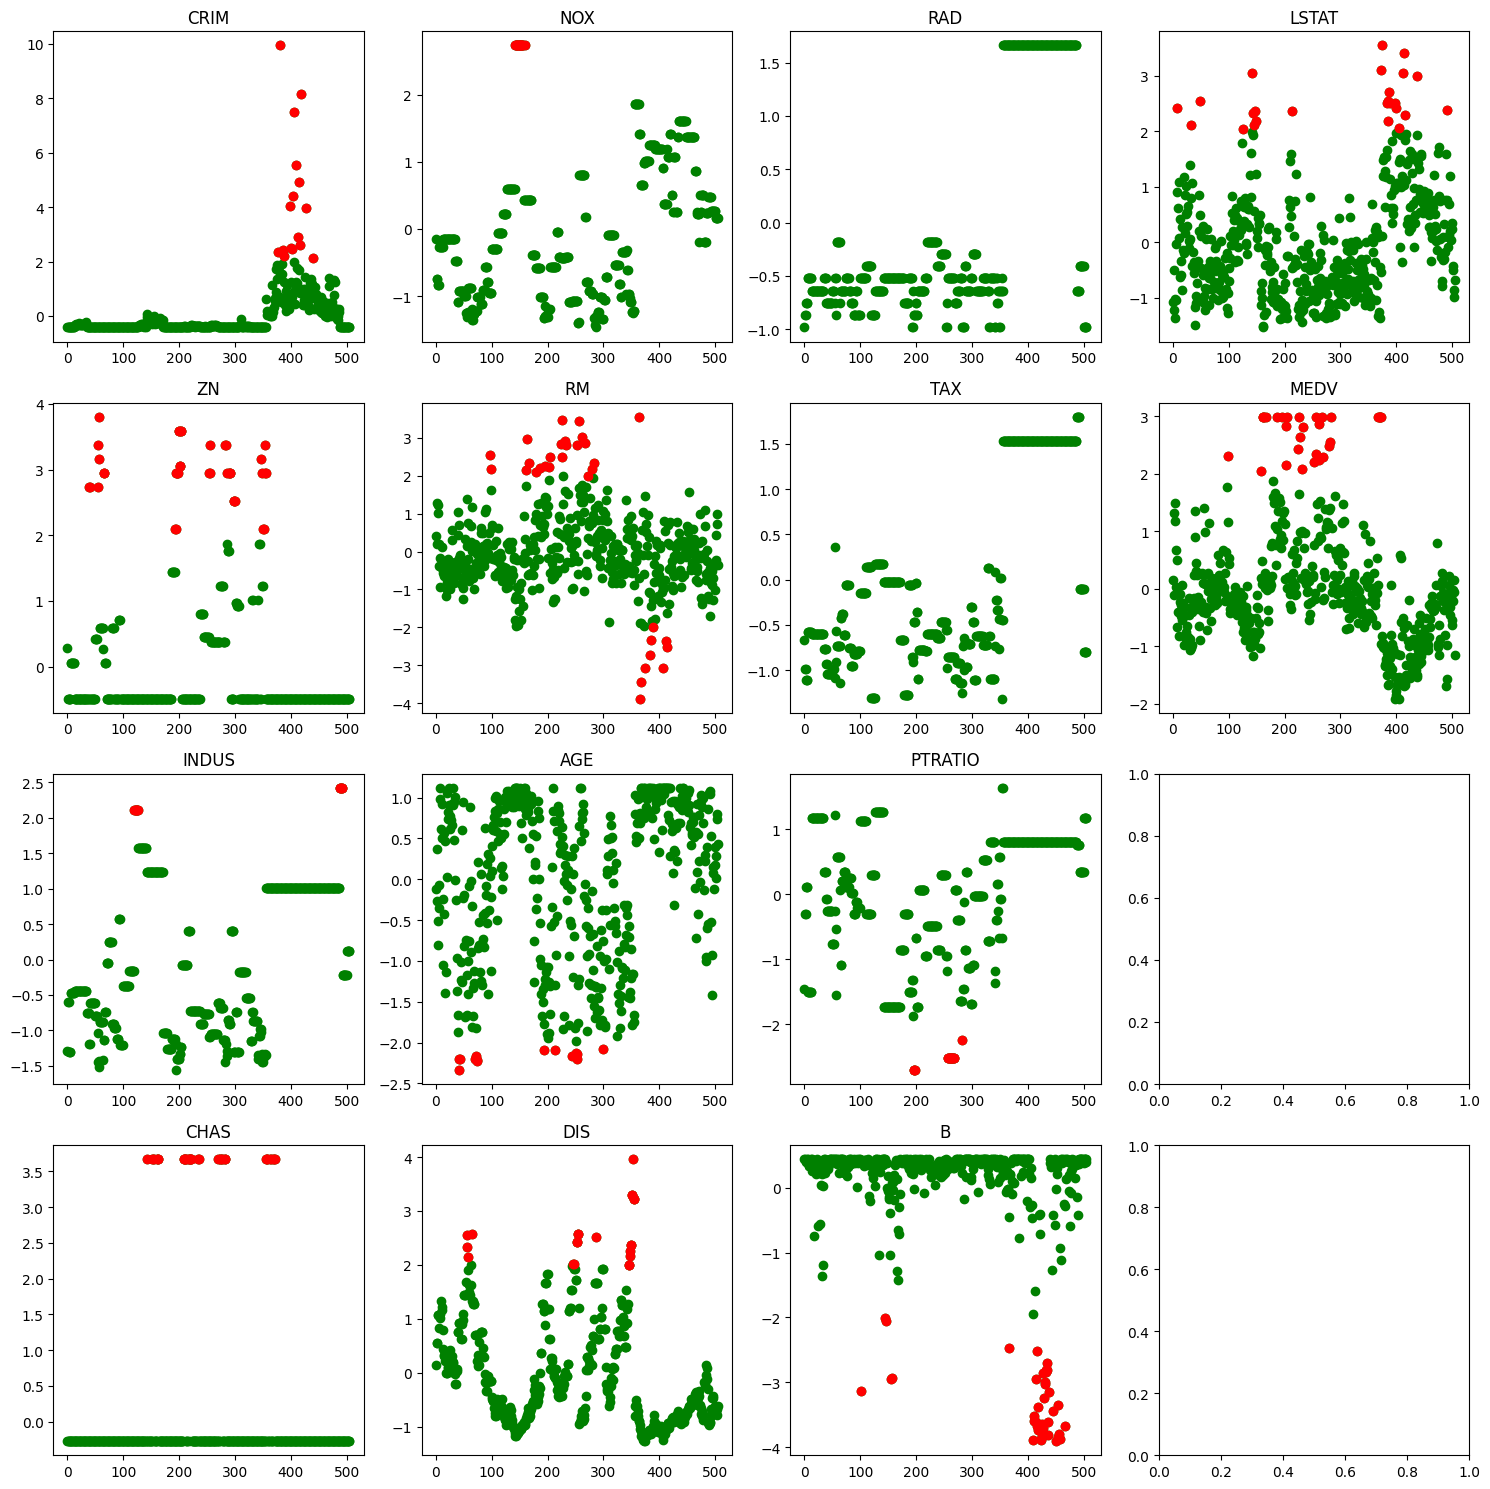

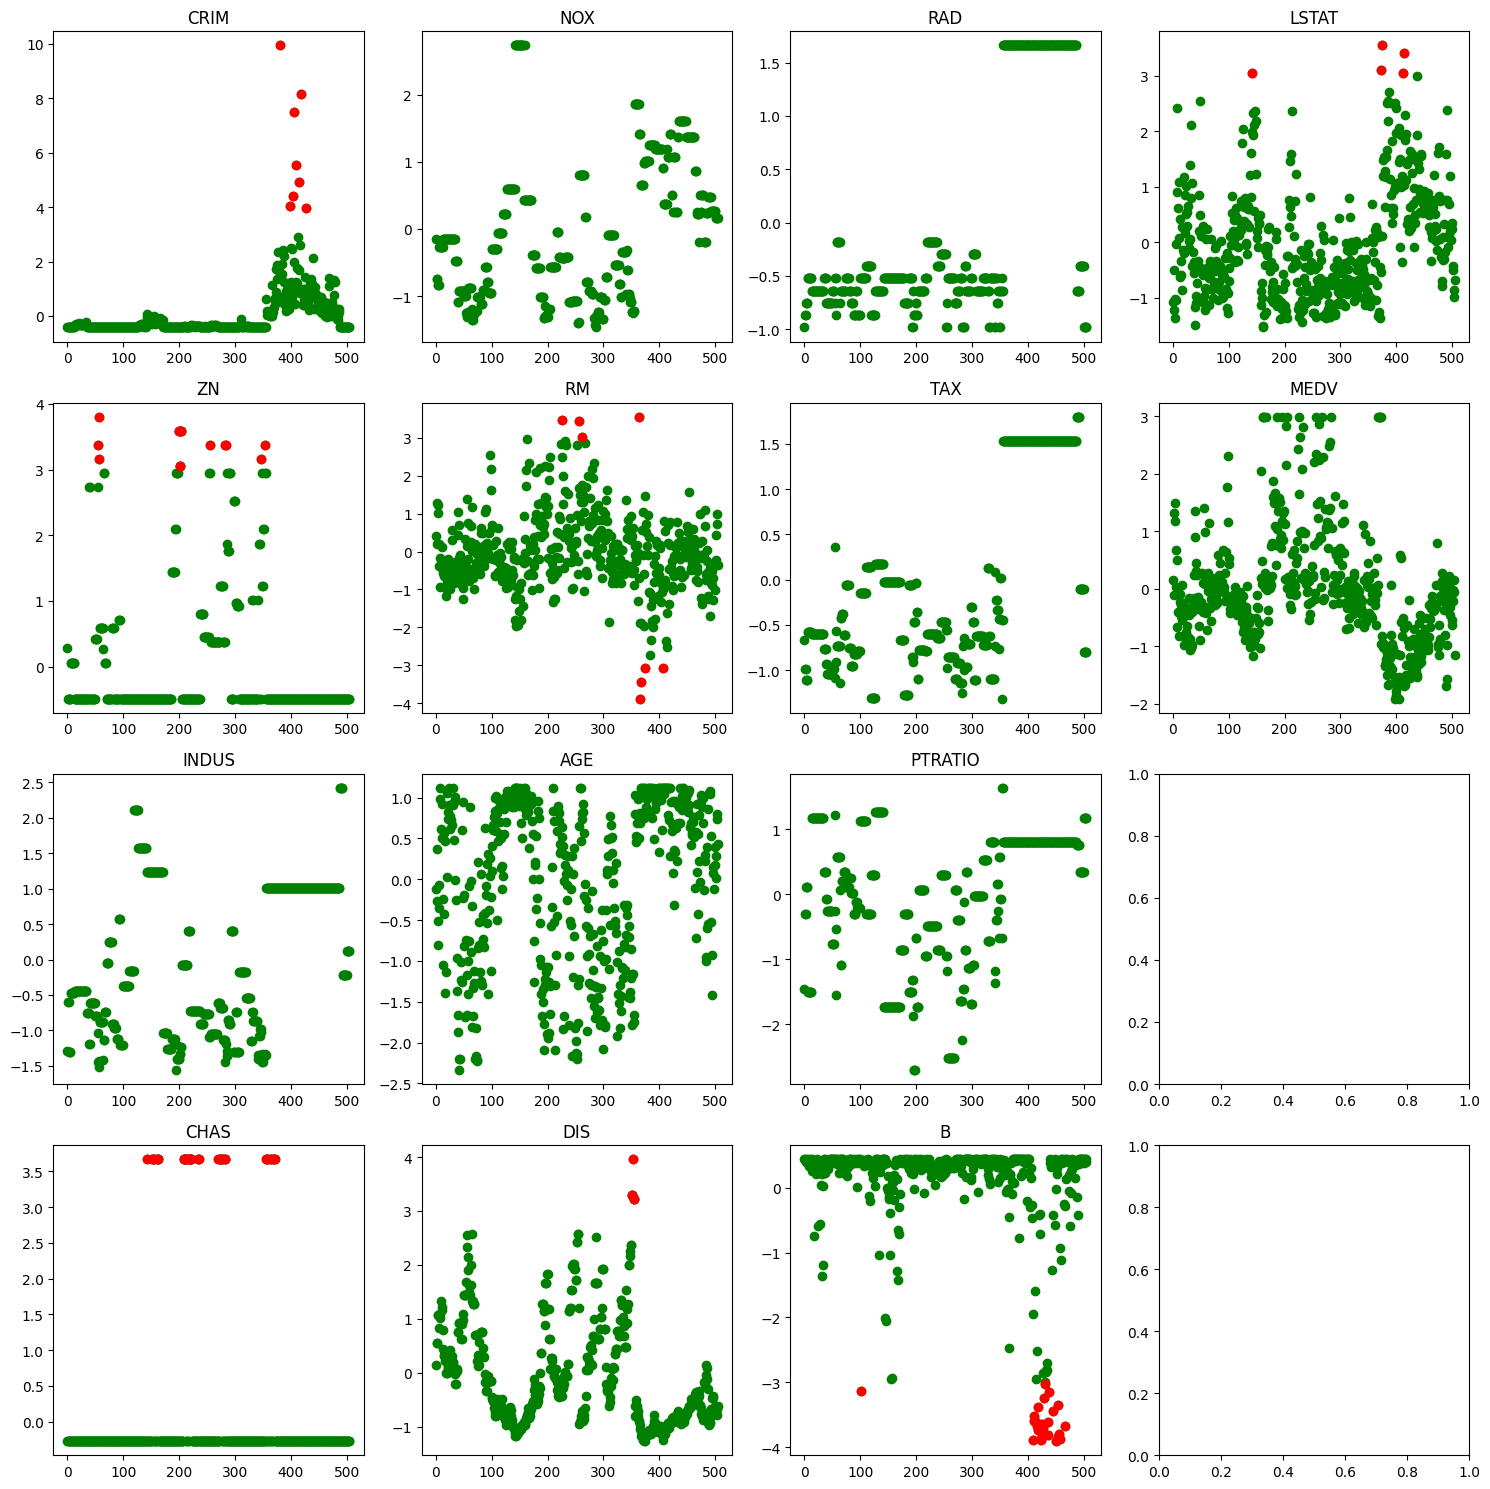

In [196]:
### creating a new empty dataframe and then assigning the column and zscore directly worked.
### This code didnt work strangely. Need to find out why.
### z_scores = zscore(df[col_name])
### df_zscore = pd.DataFrame(z_scores, columns=['zscore'])
def zscore_scatter_with_outliers(df, z_score_outlier_abs_value):
    fig,axes = plt.subplots(4, int(len(df.columns)//4)+1, figsize=(15,15))
    for i, col_name in enumerate(df.columns):
        df_zscore = pd.DataFrame()
        df_zscore['zscore'] = zscore(df[col_name])
        df_zscore_outlier = df_zscore[df_zscore['zscore'].abs() > z_score_outlier_abs_value]
        axes[i%4, i//4].scatter(df_zscore.index, df_zscore['zscore'], color='green')
        axes[i%4, i//4].set_title(col_name)
        if(len(df_zscore_outlier) != 0): 
            axes[i%4, i//4].scatter(df_zscore_outlier.index, df_zscore_outlier['zscore'], color='red')
    plt.tight_layout()
    plt.show()

zscore_scatter_with_outliers(boston_df, 2)
zscore_scatter_with_outliers(boston_df, 3)

From all the above graphs the following things can be summarized.
- CRIM - This feature shows a lot of outliers in all three methods. But removing these will not be the correct approach since the reason for these outlier detection is due to the large number of zero or close to zero crime rate in a lot of cities. Hence the other entry points should not be removed since they will be having high impact on the houing price.
- CHAS - This is a binary feature and hence outliers dont make sense in that context.
- DIS - for z-index 3 its still showing some outliers. So if we are thinking about creating  a linear regression model it would be good to remove those.
- B - Like DIS it would be good to remove those outliers if we are aiming for a linear regression model.
- MEDV - We can remove this based on the model we have in mind. In case of MEDV there is an abnormality in the histogram. The spike at the end of the histogram suggests a capping. We can remove that. Similar spikes can be observed in B PTRatio Tax and RAD. But in case of B PTRation and Tax it is explainable from the definition of the parameter. In case of RAD also its an erronous information. Since from the histogram and scatter plot we see that after value of 9 its filled with 25. This also suggests that this was kind of capping since values above 9 could not be properly filled in. 
- So we will do 2 things here 
-- remove capping in MEDV and RAD. While we remove in MEDV we will not remove RAD instead we will change the value to that of the average of 10 to 25 which is 17.5

In [197]:
print(len(boston_df))
print(boston_df['MEDV'].value_counts().head(5))
print(boston_df['MEDV'].max())
print(boston_df['RAD'].value_counts().head(5))
print(boston_df['RAD'].max())
drop_indexes = boston_df[boston_df['MEDV'] == 50].index
boston_df = boston_df.drop(drop_indexes)
print(len(boston_df))
print(boston_df['MEDV'].value_counts().head(5))

#we can see that RAD with 24 has 132 entries. Removing this wont be ideal since that would mean
# removing almost 25% of data. So instead to reduce the skewness we fill RAD with 24 with average of 5 and 24 i.e 14.5
boston_df['RAD'] = boston_df['RAD'].replace(24, 14.5)
print(boston_df['RAD'].value_counts().head(5))
print(boston_df['RAD'].max())
print(len(boston_df))


506
MEDV
50.0    16
25.0     8
22.0     7
21.7     7
23.1     7
Name: count, dtype: int64
50.0
RAD
24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
Name: count, dtype: int64
24.0
490
MEDV
25.0    8
23.1    7
22.0    7
21.7    7
19.4    6
Name: count, dtype: int64
RAD
14.5    127
5.0     109
4.0     108
3.0      37
6.0      26
Name: count, dtype: int64
14.5
490


Trying Multivariant Outlier detection techniques
Isolation forest since the data contains skewed distributions for most of the features.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Number of outliers detected: 49


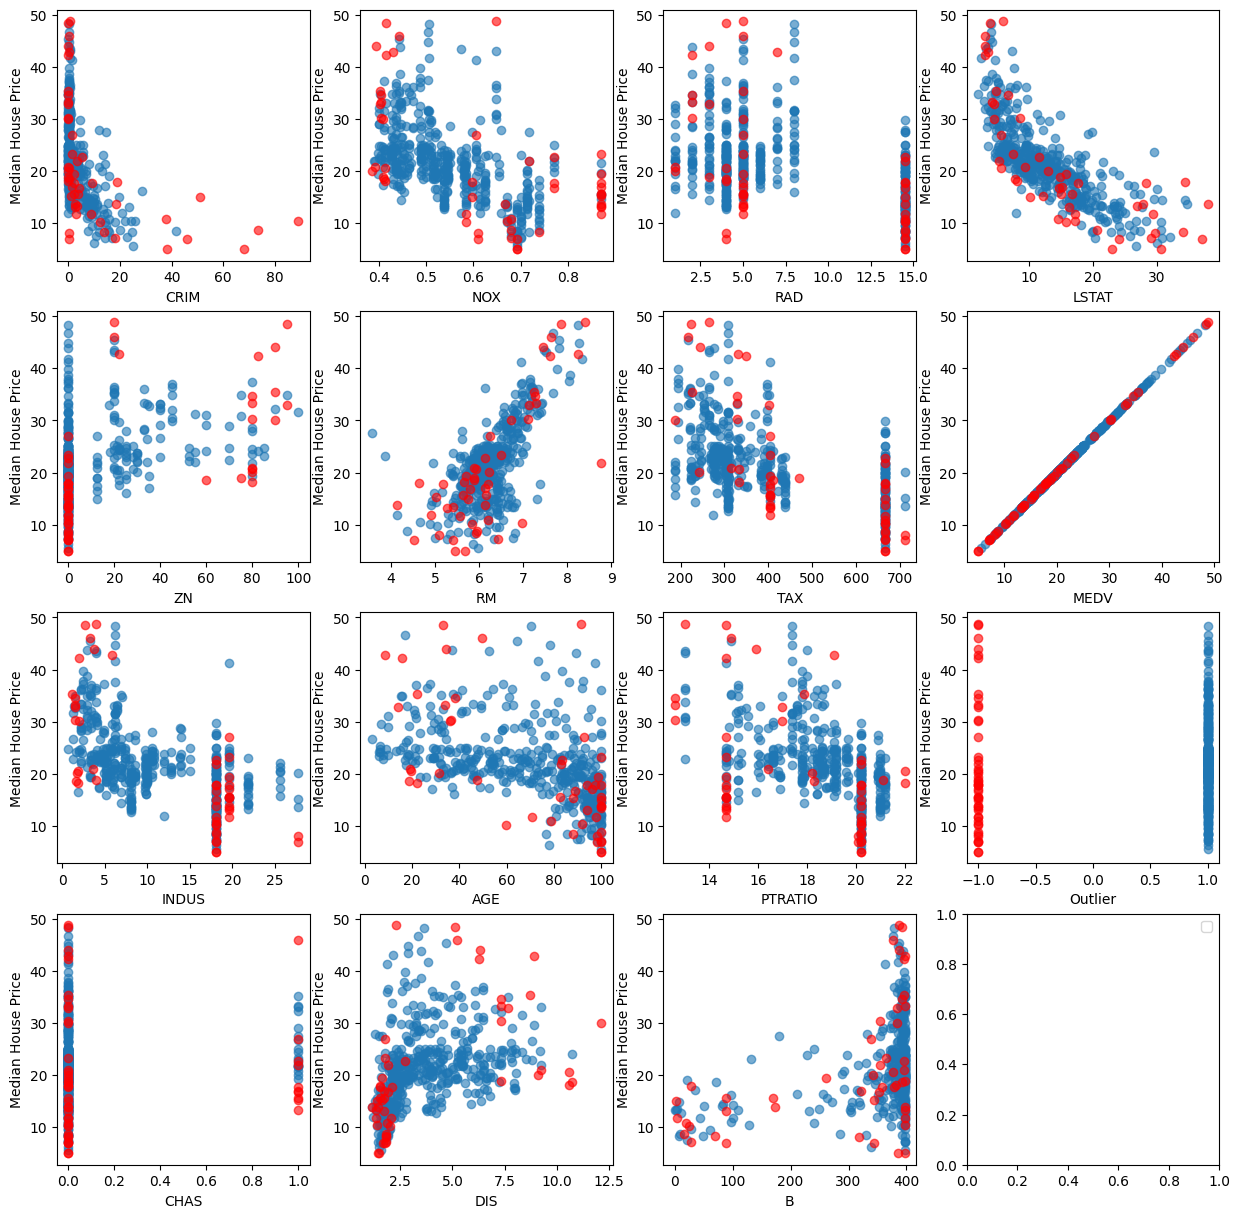

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Number of outliers detected: 25


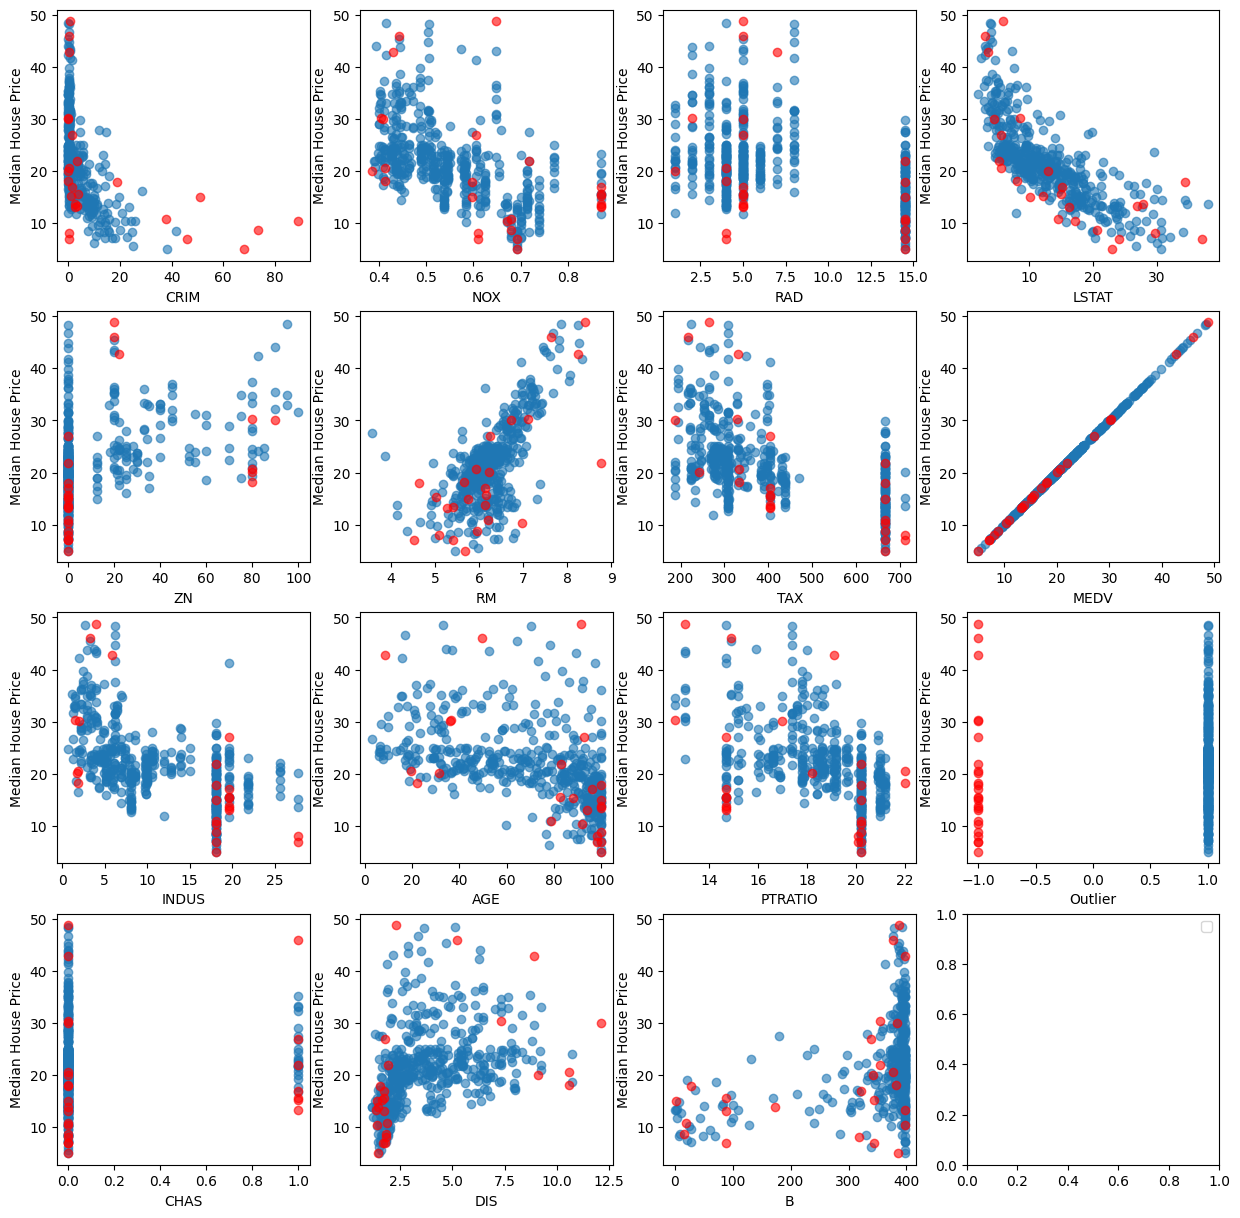

In [206]:
# isolation forest
from sklearn.ensemble import IsolationForest

def plot_outlier_using_isolation_forest(df, contamination_value, target_column_name, target_column_display_name, should_remove_outliers = False):
    iforest = IsolationForest(contamination=contamination_value, random_state=42)  # Adjust contamination as needed
    # Fit the model
    df_copy = df.copy()
    outliers = iforest.fit_predict(df_copy)

    # Step 4: Identify outliers
    # The prediction will return -1 for outliers and 1 for inliers
    df_copy['Outlier'] = outliers
    outlier_data = df_copy[df_copy['Outlier'] == -1]  # Select outliers
    inlier_data = df_copy[df_copy['Outlier'] == 1]    # Select inliers

    # Print the number of outliers found
    print(f"Number of outliers detected: {len(outlier_data)}")

    # Step 5: Visualize the results (optional)
    # Example: Plotting a scatter plot of two features with outliers highlighted
    fig,axes = plt.subplots(4, int(len(df.columns)//4)+1, figsize=(15,15))
    for i, column in enumerate(df_copy.columns):
        axes[i%4, i//4].scatter(inlier_data[column], inlier_data[target_column_name], label='Inliers', alpha=0.6)
        axes[i%4, i//4].scatter(outlier_data[column], outlier_data[target_column_name], label='Outliers', color='red', alpha=0.6)
        axes[i%4, i//4].set_xlabel(column)
        axes[i%4, i//4].set_ylabel(target_column_display_name)
    plt.legend()
    plt.show()
    if(should_remove_outliers):
        df = df.drop(outlier_data.index)
    return df

plot_outlier_using_isolation_forest(boston_df, 0.1, 'MEDV', 'Median House Price')
_ = plot_outlier_using_isolation_forest(boston_df, 0.05, 'MEDV', 'Median House Price')


- We can see that outliers detected by zscore and whisker were univariant and removing them would not be the correct approach because it doesnt take into consideration its impact in the actual value. 
- Multivariant isolation forest detection method on the other hand detects outliers based on all the features. Using contamination value of 0.05 we found 25 outliers. 
- We will remove based on contamination value of 0.05.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Number of outliers detected: 25


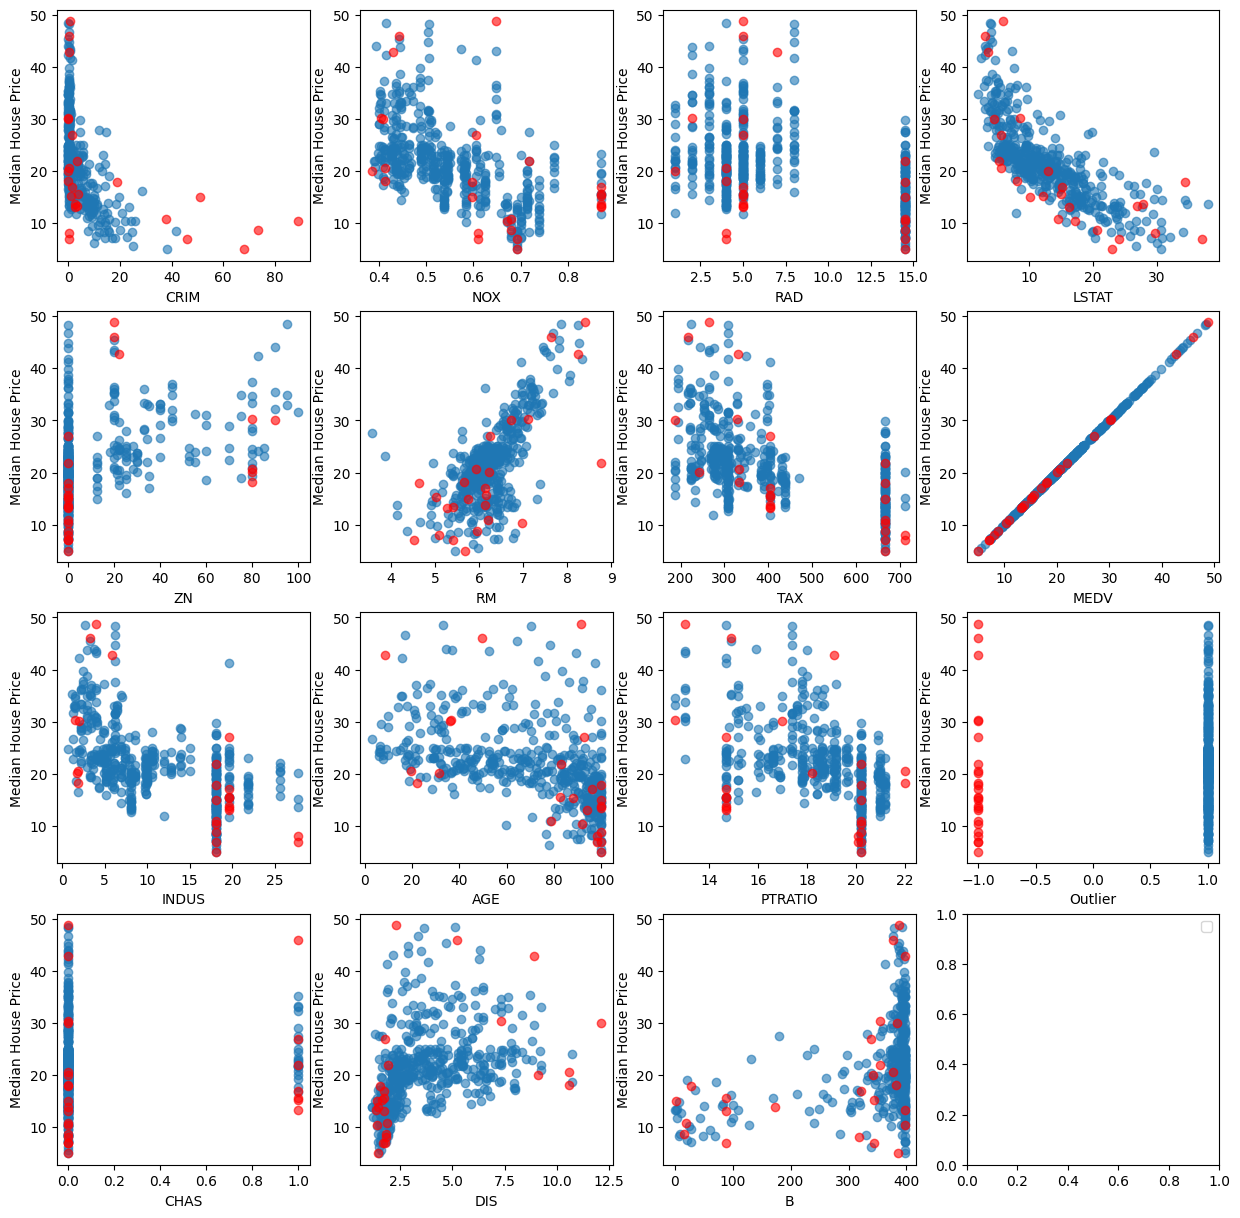

465


In [207]:
outlier_removed_df = plot_outlier_using_isolation_forest(boston_df, 0.05, 'MEDV', 'Median House Price', True)
print(len(outlier_removed_df))

Initially we had 506 datapoints and after removing outliers detected using Isolation Forest and capping value removal we have 465 datapoints.

### Part 3: Feature Engineering (17)

#### Question 6- Feature Engineering - Attribute Correlation (17)
- Load the file income_data.csv, inspect the columns.
- Determine if race and education features have a statistical relationship. 
- Explain and conclude your findings (7 till here)
- Inspect the dataset carefully and create an Indicator Feature (0/1) --(3)
- Inspect the dataset carefully and create an Interaction Feature (Additional feature engineered from your dataset)-- (3)<br>
__The features you create must be resonable, please add an explanation to explain why did you chose those features__  (2 for each explanation -> 4)

In [199]:
## TODO: Start Question 6 code here

### Part 4: Challenging Preprocessing Problems

#### Question 7: Implementing the Local Outlier Factor (LOF) Function (25)


- Local outlier factor is a function that labels outlier based on 2 predefined parameters, the first one is t **k** for k-Nearest-Neighbours. The second one is the threshold of outliers which could be set arbitrary. However, in this coding task you are required to BOX-PLOTS to determine the threshold for the local outlier factor and label your outliers.
- You are expected to implement different functions to reach the target which will be defined below.


In [200]:
def calculate_point_to_point_distance(point_a, point_b, distance_approach="Euclidean"):
    ## TODO: This function takes as an input two points (where each point is a pair of (x,y)) and returns the distance between the points.
    ## The distance is calculate based on given distance_approach
    ## You need to handle the Euclidean and Manhattan Distance Approaches in your code
    return 0

def get_points_lof(list_of_points, K=2, distance_approach = "Euclidean"):
    ## TODO: This function takes a list of points and returns a dictionary
    ## The dictionary is in format {point: LOF, ...}
    ## You can use as much helper functions as you'd like
    return { (0,0) : 1.4 } #...

def get_outliers(list_of_points, K=2, distance_approach="Euclidean"):
    ## TODO: This function uses the get_points_lof to get the LOF scores, and uses is to build a box-plot
    ## Using the box-plot points are labelled as outliers are returned to the user
    ## Example: if point (2,1) and (3,2) are labelled as outliers using box-plot
    ## Then you will return the example given in the place-holder below
    return [(2,1),(3,2)] 


##### To calculate the LOF you need to apply the following steps:
 1. Calculate the distance between each pair of points p1,p2
 2. Find your Kth nearest neighbor point (x) from current point (p):
    - After finding it, remember the distance *Nd* which is the distance from p to x, and save a set of elements which are in a neighborhood of *Nd* around point p.
    - Save the length of this set of elements.
 3. Calculate ReachDistance(x,p)=max(Nd_x, Distance(x,p))
 3. Calculate LRD (Local Reachability Distance) where LRD_p = length_of_set_p/Sum[ReachDistance(x,p)] (for each x in set of elements of point p)
 4. Calculate LOF (Local Outlier Factor) where LOF_p = {Sum[LRD_x] (for each x in set of elements of point p) * Sum[RD(x,p)] (for each x in set of elements of point p)} / length_of_set_p^2

In [201]:
## Example input
list_of_points = [[0,0],[-1,0],[0,-1],[1,0],[5,5]]
# get_outliers(list_of_points,2,distance_approach="Manhattan") ==> [(5,5)]
